In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sitka.general.settings import *
from sitka.io.time import *
from sitka.io.weather import *
from sitka.calculations.solar import *
from sitka.components.site import *

In [3]:
dir_path = os.getcwd()
weather_file = os.path.join(dir_path, 'USA_WA_Seattle-Boeing.Field.727935_TMY3.epw')

In [4]:
start_hour = 0
end_hour = 8760
time_steps_per_hour = 4

In [5]:
# Simulation run parameters
settings = Settings(dir_path)

time = Time(start_hour=start_hour, end_hour=end_hour, time_steps_per_hour=time_steps_per_hour)

weather = EPW(settings, time, weather_file)
print(weather.location)

# Setup site
site = Site(weather.latitude, weather.longitude, weather.elevation)
print(site.latitude)
print(site.longitude)

# Solar angles
solar_angles = SolarAngles(time, site)

Updating time object
Importing weather data.
file imported.
Resampling weather data.
Seattle Boeing Field  Isis
47.68
-122.25
Updating solar angles


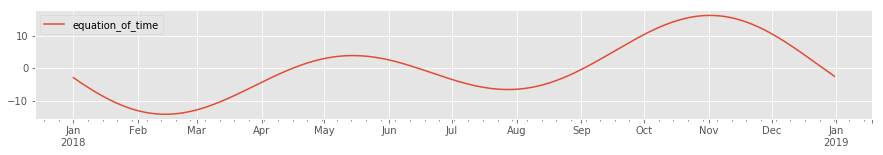

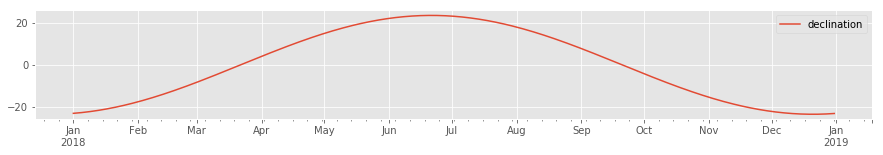

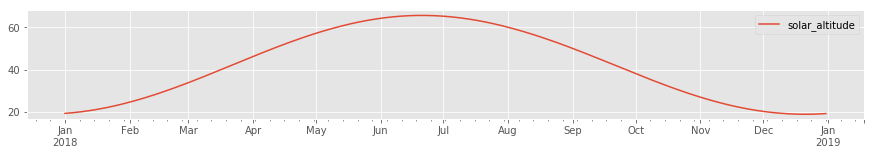

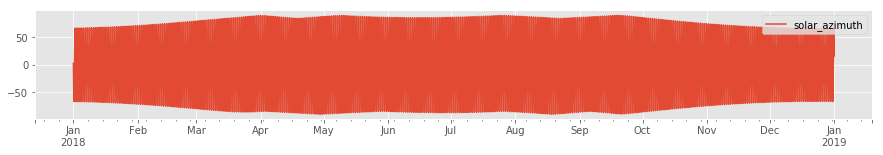

In [6]:
# Check solar angles
pd.DataFrame({'equation_of_time': solar_angles.get_time_series('equation_of_time').resample('1D').max()}).plot(figsize=[15,2])

pd.DataFrame({'declination': solar_angles.get_time_series('declination').resample('1D').max()}).plot(figsize=[15,2])

pd.DataFrame({'solar_altitude': solar_angles.get_time_series('solar_altitude').resample('1D').max()}).plot(figsize=[15,2])

pd.DataFrame({'solar_azimuth': solar_angles.get_time_series('solar_azimuth').resample('1H').mean()}).plot(figsize=[15,2])

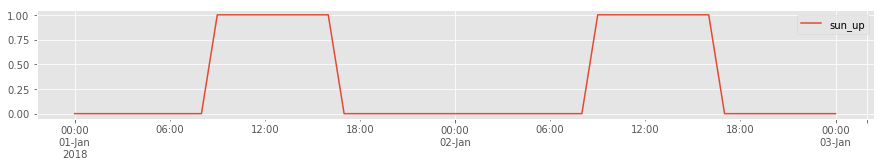

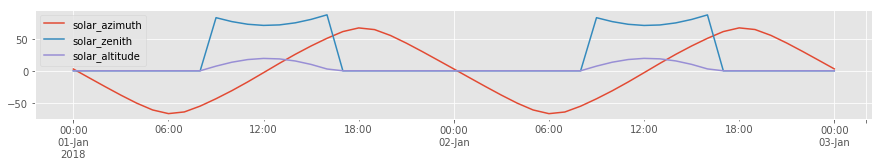

In [7]:
# Time series plots of solar angles

start_time = '2018-01-01 00:00:00'
end_time = '2018-01-03 00:00:00'

pd.DataFrame({
    'sun_up': solar_angles.get_time_series('sun_up'),
})[start_time:end_time].resample('1H').mean().plot(figsize=[15,2])

pd.DataFrame({
    'solar_azimuth': solar_angles.get_time_series('solar_azimuth'),
    'solar_zenith': solar_angles.get_time_series('solar_zenith'),
    'solar_altitude': solar_angles.get_time_series('solar_altitude'),
})[start_time:end_time].resample('1H').mean().plot(figsize=[15,2])

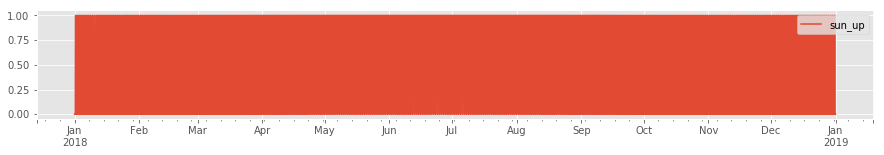

In [8]:
# Histogram of daylight length by month
df = pd.DataFrame({
    'sun_up': solar_angles.get_time_series('sun_up'),
}).resample('1H').sum()/time_steps_per_hour

df.plot(figsize=[15,2])

In [9]:
solar_angles.get_time_series('number_of_sunlight_hours').resample('1M').mean()  

2018-01-31     8.698249
2018-02-28     9.981878
2018-03-31    11.647647
2018-04-30    13.418297
2018-05-31    14.936410
2018-06-30    15.720287
2018-07-31    15.348388
2018-08-31    14.015160
2018-09-30    12.293816
2018-10-31    10.526491
2018-11-30     9.021072
2018-12-31     8.276147
Freq: M, dtype: float64

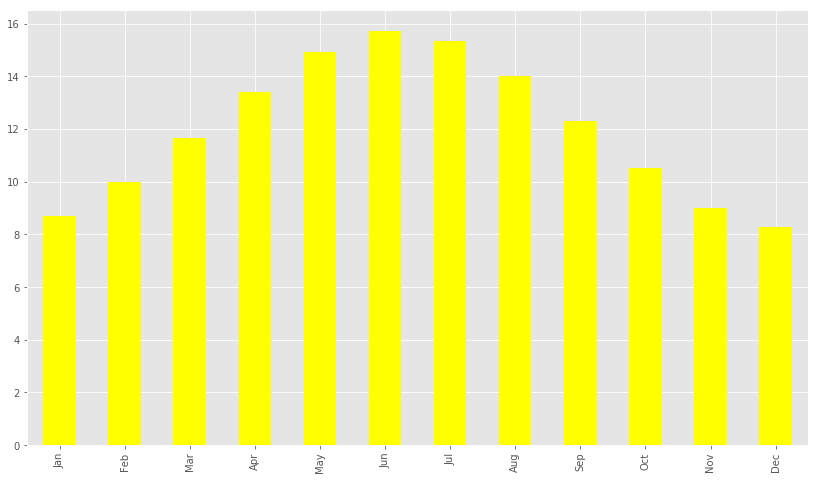

In [10]:
# Calculate the mean monthly length of sunlight hours per day
monthly_hours = pd.DataFrame({
        'number_of_sunlight_hours': solar_angles.get_time_series('number_of_sunlight_hours').resample('1M').mean()
    })

monthly_hours.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = monthly_hours.plot(legend=False, kind='bar', color=['yellow'], figsize=(14, 8))

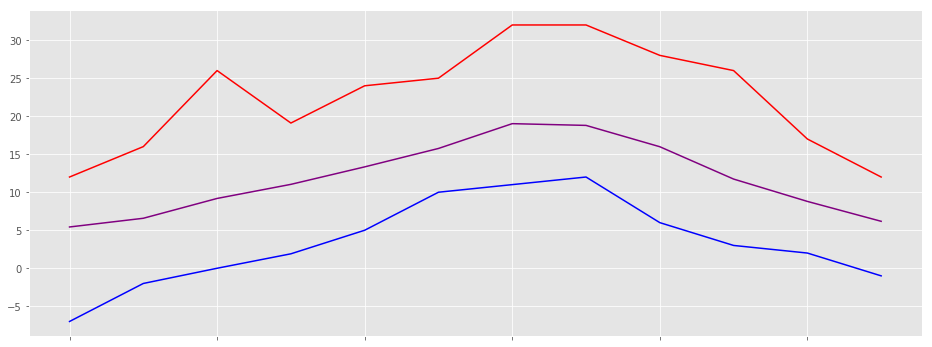

In [11]:
# Calculate the min, max and daily temperature per month
monthly_hours = pd.DataFrame({
        'min_dry_bulb_temperature': weather.dry_bulb_temperature.resample('1D').min().resample('1M').min(),
        'max_dry_bulb_temperature': weather.dry_bulb_temperature.resample('1D').max().resample('1M').max(),
        'mean_dry_bulb_temperature': weather.dry_bulb_temperature.resample('1D').mean().resample('1M').mean()
    })

monthly_hours.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = monthly_hours.plot(legend=False, color=['blue', 'red', 'purple'], figsize=(16, 6))